In [2]:
import pandas as pd

In [3]:
df_m = pd.read_csv(r"C:\Users\gadge\Documents\innomatics\movie_data\movies.csv")
df_m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_m.shape

(9742, 3)

In [7]:
df_m['title'].value_counts().to_frame()

,count
title,
Emma (1996),2
War of the Worlds (2005),2
Confessions of a Dangerous Mind (2002),2
Eros (2004),2
Saturn 3 (1980),2
...,...
Lost and Delirious (2001),1
Rape Me (Baise-moi) (2000),1
Alice (1990),1


In [13]:
df_r = pd.read_csv(r"C:\Users\gadge\Documents\innomatics\movie_data\ratings.csv")
df_r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
df_r['movieId'].mode()

0    356
Name: movieId, dtype: int64

In [15]:
filtered = df_r[df_r['movieId'] == 589]
filtered.head()

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012


In [16]:
filtered.shape

(224, 4)

In [17]:
filtered['rating'].mean()

3.970982142857143

In [18]:
filtered2 = df_r[df_r['movieId'] == 2959]
filtered2

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [19]:
import matplotlib.pyplot as plt

In [20]:
frequency_distribution = filtered2['rating'].value_counts()

In [21]:
print(frequency_distribution)

rating
5.0    81
4.5    49
4.0    49
3.5    17
3.0    10
2.0     5
0.5     3
2.5     3
1.5     1
Name: count, dtype: int64


<Axes: title={'center': 'Frequency Distribution'}, xlabel='rating'>

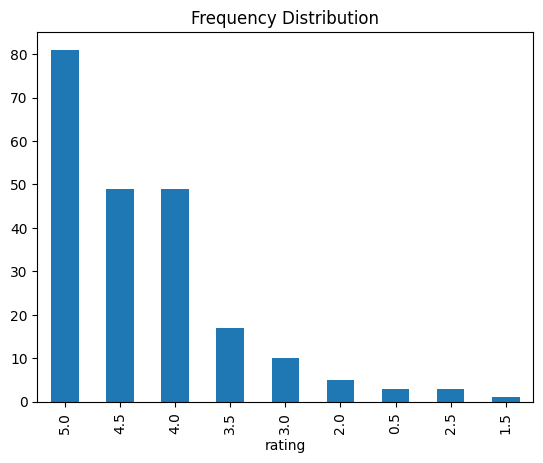

In [22]:
frequency_distribution.plot(kind='bar', title='Frequency Distribution')

In [23]:
grouped_ratings = df_r.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Step 2: Inner join with the movies DataFrame
merged_df = pd.merge(df_m, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['count'] > 50]

# Display the resulting DataFrame
print(filtered_movies)

      movieId                             title   
0           1                  Toy Story (1995)  \
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                      Adventure|Children|Fantasy    110  3.431818  
2                                  Comedy|Romance     52  3.259615  
5                           Action|Crime|Thriller    102  3.946078  
6                                  Comedy|

In [24]:
filtered_movies.head()

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [25]:
sorted_movies = filtered_movies.sort_values(by='mean', ascending=False)
sorted_movies.head()

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041


In [26]:
sorted_movies2 = filtered_movies.sort_values(by='count', ascending=False)
sorted_movies2.head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [27]:
sorted_movies2

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [28]:
sorted_movies2[5:20]

,movieId,title,genres,count,mean
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
97,110,Braveheart (1995),Action|Drama|War,237,4.031646
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
461,527,Schindler's List (1993),Drama|War,220,4.225000
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745
2144,2858,American Beauty (1999),Drama|Romance,204,4.056373


In [58]:
links = pd.read_csv(r"C:\Users\gadge\Documents\innomatics\movie_data\links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [30]:
merged_data = pd.merge(filtered_movies, links, on='movieId', how='inner')

In [52]:
merged_data.head()

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [49]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import json

def get_imdb_rating(imdb_id):
    # Construct the IMDb URL using the provided IMDb identifier
    imdb_url = f"http://www.imdb.com/title/tt{imdb_id}/"

    # Send a GET request to the IMDb page
    response = Request(imdb_url, headers={'User-Agent': 'Mozilla/5.0'})

    # Parse the HTML content of the IMDb page
    webpage = urlopen(response).read()
    soup = BeautifulSoup(webpage, 'html.parser')

    # Find the element containing the rating (e.g., <span itemprop="ratingValue">)
    rating_element = soup.find('script', type = 'application/ld+json')

    if rating_element:
        # Extract the rating value
        rating = rating_element.contents[0]
        movie_data = json.loads(rating)
        aggregate_rating = movie_data.get('aggregateRating', {})
        rating_value = aggregate_rating.get('ratingValue')
        return float(rating_value)  # Convert the rating to a float
    else:
        print(f"Rating not found for IMDb ID: {imdb_id}")
        return None

In [50]:
print(get_imdb_rating("0114709"))

8.3


In [56]:
merged_data['imdb_rating'] = 0
merged_data.head()

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,0


In [59]:
for i in range(436):
    rating = get_imdb_rating('0'*(7-len(str(merged_data['imdbId'][i]))) + str(merged_data['imdbId'][i]))
    merged_data['imdb_rating'][i] = rating

In [60]:
merged_data.head()

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3


In [61]:
sorted_movie3 = merged_data.sort_values(by='imdb_rating', ascending=False)
sorted_movie3.head()

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb_rating
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185,4.118919,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0


In [62]:
sorted_movie3[6:20]

,movieId,title,genres,count,mean,imdbId,tmdbId,imdb_rating
407,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149,4.238255,468569,155.0,9.0
49,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068,110912,680.0,8.9
331,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198,4.106061,120737,120.0,8.9
61,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134,109830,13.0,8.8
273,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936,137523,550.0,8.8
145,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,72,4.145833,60196,429.0,8.8
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
345,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188,4.021277,167261,121.0,8.8
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7
